In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import minimize
import random


In [2]:
#introducción de los datos
#N es la cantidad de datos, NN el número de iteraciones para el programa caminante
#definición de av y bv para guardar los parámetros que cumplen la regla de selección
#av[0] y bv[0] son los parametros iniciales dados por uno, cv, y la creación de otras listas es para 
#parametros de otros modelos
#x1 y y1 son los datos 
N=50
NN=10000
dt=np.load('fit_exercise.npy')
x1 = dt[0]
y1 = dt[1]
v=np.var(y1)
av=np.zeros(NN)
bv=np.zeros(NN)
av2=np.zeros(NN)
bv2=np.zeros(NN)
cv=np.zeros(NN)
pv=np.zeros(NN)

Usare un prior plano i.e cuando tenemos un prior plano:
$$e^{-\frac{(\mu-\mu_{0})^{2}}{2\sigma_{0}^{2}}}\rightarrow 1$$
cuando $\mu_{0}=0$ y $\sigma_{0}\rightarrow \infty$ así en el posterior solo queda el likelihood por maximizar
$$e^{-\frac{(y_{i}-\mu)^{2}}{2\sigma^{2}}}$$, recordando $\mu$ es el modelo

In [3]:
def modelo(a, b):
        mod = a + (b*x1)
    #mod=a*(x**2)+b*x + c
    #mod=a*np.cos(b*x)+c
        return mod

In [4]:
#menos logaritmo de likelihood gaussiano
def ls(a, b):
        mu = modelo(a, b)
        #-(n*0.5)*np.log(2*np.pi*var)
        f = 0.5*(v**(-1))*np.sum((y1-mu)**2)
        return f

In [5]:
def MCM3(p1, p2):
#v, varianza de nuestros datos
#vector a guardar parametros, av, bv, cv, dependiendo del modelo
#hay que modificar los parametros que pide modelo, likelihood y MCM2
#likelihood, puede ser distinto al gaussiano
#x1, y1 los datos
#n cantidad de datos
#NN iteraciones
    #v = np.var(y1)
    av[0] = p1
    bv[0] = p2
    accepteda = []
    acceptedb = []
    rejecteda = [] 
    rejectedb = []   
    for k in range(NN-1):
        ak = np.random.normal(av[k], 0.1)
        bk = np.random.normal(bv[k], 0.1)
        posteriorold = ls(av[k], bv[k])
        posteriornew = ls(ak, bk)
        if posteriornew < posteriorold:
            av[k+1] = ak
            bv[k+1] = bk
            accepteda.append(ak)
            acceptedb.append(bk)
        else:
            ran = -np.log(random.uniform(0, 1))
            ratio = posteriornew-posteriorold
            if ratio < ran:
                av[k+1] = ak
                bv[k+1] = bk
                accepteda.append(ak)
                acceptedb.append(bk)
            else:
                av[k+1] = np.copy(av[k])
                bv[k+1] = np.copy(bv[k])
                rejecteda.append(ak)
                rejectedb.append(bk)  
    ta=np.array(accepteda)
    tb=np.array(acceptedb)
    ra=np.array(rejecteda)
    rb=np.array(rejectedb)
    return ta, tb, ra, rb, plt.plot(ta, tb, 'o'), print('el parámetro a es', ta.mean()), print('el parámetro b es', tb.mean())

el parámetro a es 4.448805966504906
el parámetro b es -0.9404941506594758


(array([1.88643661, 1.74363509, 1.84205235, ..., 3.9310373 , 3.95847798,
        3.97126719]),
 array([ 3.89386673,  3.7405454 ,  3.60881009, ..., -0.92814763,
        -0.8808008 , -0.90560043]),
 array([1.6927171 , 1.6401909 , 1.80192173, ..., 3.91589393, 3.9948259 ,
        3.7948224 ]),
 array([ 3.96906407,  3.81953581,  3.84442898, ..., -0.77872427,
        -1.00857618, -0.9150481 ]),
 None,
 None)

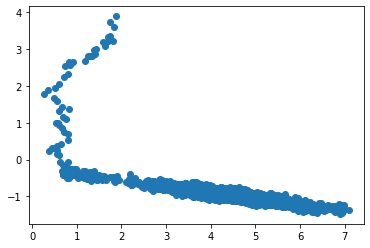

In [6]:
MCM3(2, 4)

In [7]:
ta

NameError: name 'ta' is not defined